<a href="https://colab.research.google.com/github/Ziqi-Li/GEO4162C/blob/spring-24/notebooks/Accessing%20census%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching Census data using `census` package

This tutorial will help you to learn how to fetch census data directly using python so to avoid hassles downloading from the census website.

Install `census` and `us` package. The `us` package provides some convenient lookup to the FIPS code.

In [ ]:
pip install -q census

In [ ]:
pip install -q us

Import the packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
import us

First, get yourself a Census API key from [here](https://api.census.gov/data/key_signup.html). This will require you to put your affliation and your email. Then you need to activate your API key through email. You will then get a long key string to replace what I have here:

In [ ]:
census_api_key = "0ed8bfc03db7e7bf1b990114c59b0840650c4fc7"

c = Census(census_api_key)

Then we can use a function to automatically download census data and make it into a nicely formatted Dataframe.

Below is an example to fetch the census tract level data for variables:

*   Total population (B01003_001E)
*   Median monthly housing costs (B25105_001E)
*   Travel means (car, truck, van) to work (B08134_011E)


Lookup table for variables: https://api.census.gov/data/2019/acs/acs5/variables.html

In [ ]:
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html

fl_census = c.acs5.state_county_tract(fields = ('NAME', 'B01003_001E', 'B25105_001E', 'B08134_001E'), #variable names
                                      state_fips = '12',
                                      county_fips = "*", #"*" means all counties in the state
                                      tract = "*", #"*" means all tracts in the counties/state
                                      year = 2019)

Make the results a data frame.

In [ ]:
fl_df = pd.DataFrame(fl_census)

In [ ]:
fl_df

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128
...,...,...,...,...,...,...,...
4240,"Census Tract 312, Clay County, Florida",15742.0,1207.0,6301.0,12,019,031200
4241,"Census Tract 308.01, Clay County, Florida",5723.0,1212.0,2402.0,12,019,030801
4242,"Census Tract 309.02, Clay County, Florida",10342.0,1022.0,4798.0,12,019,030902
4243,"Census Tract 303.01, Clay County, Florida",8960.0,969.0,4013.0,12,019,030301


In [ ]:
fl_df.head()

,NAME,B01003_001E,B25105_001E,B08134_001E,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128


Make column names more intuitive.

In [ ]:
fl_df = fl_df.rename(columns={
    "B01003_001E": "total_population",
    "B25105_001E": "monthly_housing_costs",
    "B08134_001E": "population_drive_to_work"
    })

In [ ]:
fl_df.head()

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128


## FIPS Code

Each census unit is identified by the FIPS (Federal Information Processing Standard) code

<img src="https://blog.cdxtech.com/Blog/image.axd?picture=2012%2F8%2FFIPS+CODE.png">

# Obtain a boundary file from TIGER

A quick and easy way to directly fetch boundary from TIGER.

First we need to know the URL of the unit we want.

In [ ]:
urls = us.states.FL.shapefile_urls()

urls.keys()

dict_keys(['tract', 'cd', 'county', 'state', 'zcta', 'block', 'blockgroup'])

This will return you with an URL, that you can pass into geopandas's `read_file`.

In [ ]:
urls['tract']

'https://www2.census.gov/geo/tiger/TIGER2010/TRACT/2010/tl_2010_12_tract10.zip'

Here, we are interested in the census tract level for Florida. *You are only  able to get the 2010 TIGER method using this method.

In [ ]:
url = urls['tract']

In [ ]:
fl_tract = gpd.read_file(url)


<Axes: >

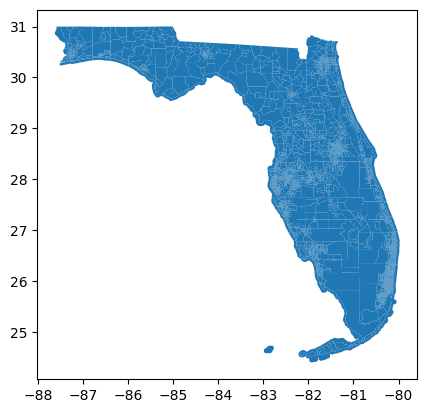

In [ ]:
fl_tract.plot()

In [ ]:
fl_tract.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,12,009,068300,12009068300,683,Census Tract 683,G5020,S,1886507,1893264,+28.3410296,-080.6080301,"POLYGON ((-80.60549 28.32007, -80.60687 28.320..."
1,12,009,068400,12009068400,684,Census Tract 684,G5020,S,1699567,6242872,+28.3579064,-080.6330330,"POLYGON ((-80.60214 28.35788, -80.60305 28.357..."
2,12,009,068601,12009068601,686.01,Census Tract 686.01,G5020,S,2981908,4187210,+28.4044135,-080.6306937,"POLYGON ((-80.64618 28.40506, -80.64619 28.405..."
3,12,009,068502,12009068502,685.02,Census Tract 685.02,G5020,S,1021413,549457,+28.3860845,-080.5984860,"POLYGON ((-80.59516 28.37972, -80.59896 28.379..."
4,12,009,068602,12009068602,686.02,Census Tract 686.02,G5020,S,3243209,1436745,+28.4023088,-080.6001604,"POLYGON ((-80.63220 28.40926, -80.62712 28.409..."


The GeoDataFrame has FIPS code that we can use to join with the census data. Note that the GEOID10 concatenates state, county and tract code together into a 11-digit code.

To make a consistent key, we need to create a new column in the census dataframe `fl_df` in the same structure as the `GEOID10` in `fl_tract`.

In [ ]:
fl_df.head()

,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county,tract
0,"Census Tract 2.11, Miami-Dade County, Florida",2812.0,1456.0,1449.0,12,086,000211
1,"Census Tract 2.12, Miami-Dade County, Florida",4709.0,1111.0,2157.0,12,086,000212
2,"Census Tract 2.13, Miami-Dade County, Florida",5005.0,1260.0,2194.0,12,086,000213
3,"Census Tract 2.14, Miami-Dade County, Florida",6754.0,1070.0,3194.0,12,086,000214
4,"Census Tract 1.28, Miami-Dade County, Florida",3021.0,1322.0,1965.0,12,086,000128


In [ ]:
fl_df["GEOID10"] = fl_df["state"] + fl_df["county"] + fl_df["tract"]

In [ ]:
fl_df["GEOID10"]

0       12086000211
1       12086000212
2       12086000213
3       12086000214
4       12086000128
           ...     
4240    12019031200
4241    12019030801
4242    12019030902
4243    12019030301
4244    12019031400
Name: GEOID10, Length: 4245, dtype: object

Merge two dataframes based on the same key `GEOID10`.

In [ ]:
fl_tract_df = pd.merge(fl_tract, fl_df,on="GEOID10")

In [ ]:
fl_tract_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,NAME,total_population,monthly_housing_costs,population_drive_to_work,state,county,tract
0,12,009,068300,12009068300,683,Census Tract 683,G5020,S,1886507,1893264,+28.3410296,-080.6080301,"POLYGON ((-80.60549 28.32007, -80.60687 28.320...","Census Tract 683, Brevard County, Florida",2790.0,1068.0,675.0,12,009,068300
1,12,009,068400,12009068400,684,Census Tract 684,G5020,S,1699567,6242872,+28.3579064,-080.6330330,"POLYGON ((-80.60214 28.35788, -80.60305 28.357...","Census Tract 684, Brevard County, Florida",2001.0,948.0,606.0,12,009,068400
2,12,009,068601,12009068601,686.01,Census Tract 686.01,G5020,S,2981908,4187210,+28.4044135,-080.6306937,"POLYGON ((-80.64618 28.40506, -80.64619 28.405...","Census Tract 686.01, Brevard County, Florida",1978.0,898.0,771.0,12,009,068601
3,12,009,068502,12009068502,685.02,Census Tract 685.02,G5020,S,1021413,549457,+28.3860845,-080.5984860,"POLYGON ((-80.59516 28.37972, -80.59896 28.379...","Census Tract 685.02, Brevard County, Florida",2492.0,848.0,1190.0,12,009,068502
4,12,009,068602,12009068602,686.02,Census Tract 686.02,G5020,S,3243209,1436745,+28.4023088,-080.6001604,"POLYGON ((-80.63220 28.40926, -80.62712 28.409...","Census Tract 686.02, Brevard County, Florida",4272.0,957.0,1458.0,12,009,068602


<Axes: >

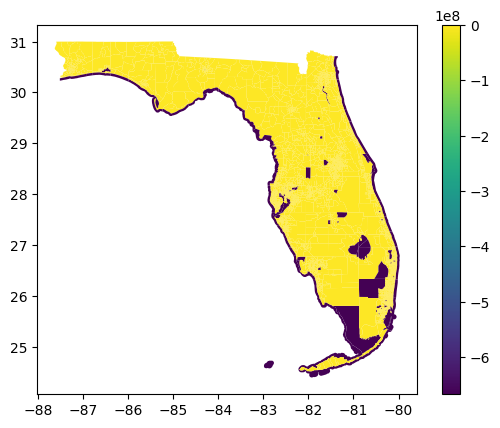

In [ ]:
fl_tract_df.plot(column="monthly_housing_costs",legend=True)

What happened? Why there are values really odd? This may happen for some variables if there are missing data.

<Axes: >

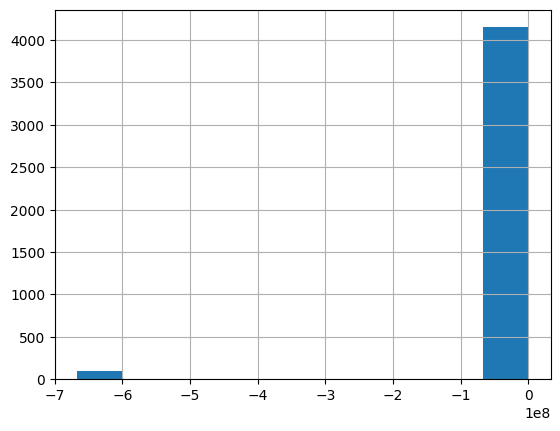

In [ ]:
fl_tract_df.monthly_housing_costs.hist()

It seems there are some missing values coded as -666666666.0 that skewed the map.

In [ ]:
import numpy as np

In [ ]:
fl_tract_df.monthly_housing_costs.to_string()

'0            1068.0\n1             948.0\n2             898.0\n3             848.0\n4             957.0\n5      -666666666.0\n6             849.0\n7            1099.0\n8             765.0\n9             792.0\n10           1119.0\n11            702.0\n12           1256.0\n13           1025.0\n14            887.0\n15            847.0\n16            707.0\n17            683.0\n18            991.0\n19            741.0\n20           1347.0\n21           1091.0\n22           1053.0\n23            686.0\n24           1364.0\n25     -666666666.0\n26     -666666666.0\n27           1494.0\n28           1040.0\n29           1190.0\n30           1288.0\n31           1250.0\n32           1221.0\n33           1294.0\n34           1496.0\n35            943.0\n36           2527.0\n37           1083.0\n38           1117.0\n39           1504.0\n40           1053.0\n41           1183.0\n42           1412.0\n43           1547.0\n44           1146.0\n45           1203.0\n46            585.0\n47          

What we can do is to make the missing value as NA.

In [ ]:
import numpy as np
fl_tract_df = fl_tract_df.replace(-666666666.0, np.nan)

It looks much normal now. Note that the value represents housing costs in USD.

Text(0.5, 1.0, 'Monthly housing costs ($)')

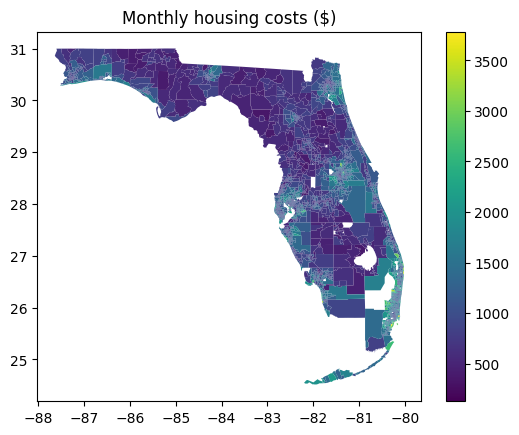

In [ ]:
fl_tract_df.plot(column="monthly_housing_costs",legend=True)
plt.title("Monthly housing costs ($)")

<Axes: >

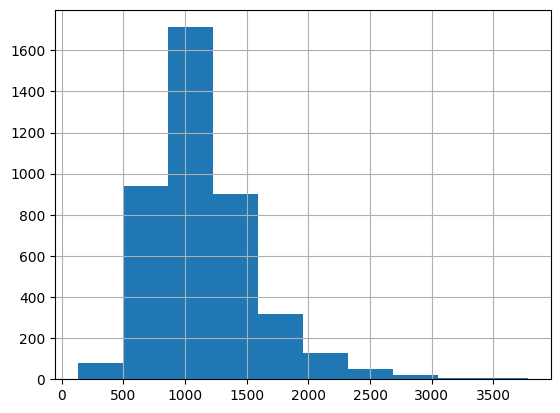

In [ ]:
fl_tract_df["monthly_housing_costs"].hist()

Now let's look at the other variable, population drive to work. Here we can calculate the % of people drive to work and make a new column in the dataframe.

In [ ]:
fl_tract_df["pct_drive"] = fl_tract_df["population_drive_to_work"]/fl_tract_df["total_population"]*100



<Axes: >

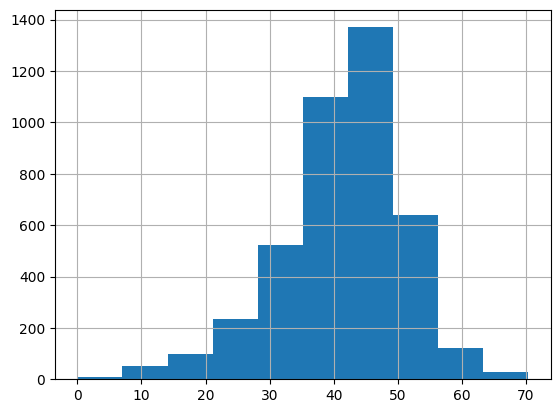

In [ ]:
fl_tract_df["pct_drive"].hist()

Text(0.5, 1.0, '% of People drive to work')

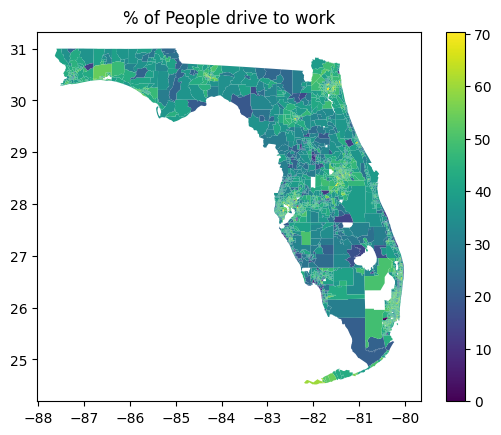

In [ ]:
fl_tract_df.plot(column="pct_drive",legend=True)
plt.title("% of People drive to work")

A simple scatterplot showing a positive correlation between the two variables.

Text(0, 0.5, 'Monthly Housing Costs')

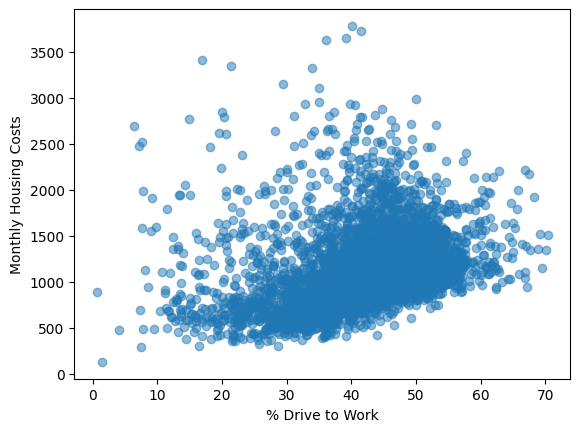

In [ ]:
plt.scatter(fl_tract_df["pct_drive"], fl_tract_df["monthly_housing_costs"],alpha=0.5)
plt.xlabel("% Drive to Work")
plt.ylabel("Monthly Housing Costs")